# ch 17_3. multiple linear regerssion

## Multiple Linear Regression
이번에는 지난 챕터에 이어서 다중 선형 회귀를 torch를 이용해서 학습시켜보겠습니다. 아래와 같은 데이터가 주어졌다고 해보겠습니다.

| x1(quiz1) | x2(quiz2) | x3(midterm1) | Y(final) |
| --- | --- | --- | --- |
| 73 | 80 | 75 | 152 |
| 93 | 88 | 93 | 185 |
| 89 | 91 | 90 | 180 |
| 96 | 98 | 100 | 196 |
| 73 | 66 | 70 | 142 |

이렇게 독립 변수가 3개인 상황에서 H(x)를 세워보겠습니다. 

$$H(x_{1}, x_{2}, x_{3})=w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+b$$

$$cost(W,b)=\frac{1}{m}\sum_{i=1}^{m}(H(x_{1i}, x_{2i}, x_{3i})-y_{i})^2$$

독립 변수가 n개인 상황도 마찬가지겠죠? 위 식을 일반화 시켜보겠습니다.

$$H(x_{1}, x_{2}, ..., x_{n})=w_{1}x_{1}+w_{2}x_{2}+...+w_{n}x_{n}+b$$

$$cost(W,b)=\frac{1}{m}\sum_{i=1}^{m}(H(x_{1i}, x_{2i}, ..., x_{ni})-y_{i})^2$$

## Matrix

독립 변수의 개수가 많아질 수록 표현하기가 불편합니다. 이 때, Matrix를 이용하면 데이터를 효과적으로 표현할 수 있습니다. 행렬의 곱셈을 이용하면 n개의 독립 변수와 n개의 weight의 곱을 아래 처럼 표현할 수 있습니다.

$$(x_{1},x_{2},...x_{n})\cdot\begin{pmatrix}
 w_{1}\\ 
 w_{2}\\
 ...\\
 w_{n}\\
\end{pmatrix}=(x_{1}w_{1}+x_{2}w_{2}+...+x_{n}w_{n})$$

이를 단순화 시키면 아래처럼 나타낼 수 있습니다. X는 독립 변수의 행렬, W는 weight의 행렬이 됩니다. 두 행렬의 곱으로 hypothesis 함수를 표현할 수 있습니다.

$$H(X)=XW$$

다시 예시 데이터로 돌아가보겠습니다.

| x1(quiz1) | x2(quiz2) | x3(midterm1) | Y(final) |
| --- | --- | --- | --- |
| 73 | 80 | 75 | 152 |
| 93 | 88 | 93 | 185 |
| 89 | 91 | 90 | 180 |
| 96 | 98 | 100 | 196 |
| 73 | 66 | 70 | 142 |

하나의 데이터 샘플에는 x1, x2, x3 총 3개의 독립 변수가 들어있습니다. 각각의 독립변수에 weight를 곱해주어 예측 값을 만들고, 이를 실제 y값과 비교하고자 합니다. 이 때, 각각의 데이터 샘플을 따로따로 계산해주는 것이 아니라, 행렬로 만들어서 한번에 계산하면 훨씬 효과적이겠죠? 수식으로 한번 표현해보겠습니다.

$$n:\text{독립 변수의 개수}$$
$$m:\text{전체 데이터 샘플의 개수}$$

$$
\begin{pmatrix}
x_{11},x_{12},...x_{1n} \\
x_{21},x_{22},...x_{2n} \\
...\\
x_{m1},x_{m2},...x_{mn} \\
\end{pmatrix}
\cdot
\begin{pmatrix}
 w_{1}\\ 
 w_{2}\\
 ...\\
 w_{n}\\
\end{pmatrix}=
\begin{pmatrix}
x_{11}w_{1}+x_{12}w_{2}+x_{1n}w_{n} \\
x_{21}w_{1}+x_{22}w_{2}+x_{2n}w_{n} \\
...\\
x_{m1}w_{1}+x_{m2}w_{2}+x_{mn}w_{n} \\
\end{pmatrix}
$$

$$[M, N] * [N, 1] = [M, 1]$$
$$𝐻(𝑋)=𝑋𝑊$$

## torch multiple linear regression

torch를 이용해서 다중 선형 회귀를 학습시켜 보겠습니다. 다이아몬드 데이터 셋에서 다이아몬드의 carat, x, y, z 값을 이용해서 price를 예측하는 모델을 학습시켜보겠습니다. 

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("./data/diamonds.csv")
df = df.sample(1000, random_state=1234)
df = df[["carat", "x", "y", "z", "price"]]

minmax_scaler = MinMaxScaler()
df[["carat", "x", "y", "z", "price"]] = minmax_scaler.fit_transform(df)

In [12]:
df

,carat,x,y,z,price
18197,0.565401,0.677670,0.687747,0.752542,0.380155
34622,0.033755,0.095146,0.094862,0.081356,0.027204
42495,0.118143,0.240777,0.252964,0.261017,0.051482
40139,0.198312,0.337864,0.316206,0.403390,0.040373
3872,0.282700,0.436893,0.452569,0.484746,0.168590
...,...,...,...,...,...
21956,0.535865,0.673786,0.701581,0.711864,0.523113
52371,0.122363,0.258252,0.276680,0.257627,0.115645
16157,0.476793,0.633010,0.640316,0.667797,0.329919
15720,0.341772,0.504854,0.511858,0.542373,0.320815


### MultiLinearRegression 모델 클래스 작성

torch를 이용한 다중 선형 회귀 모델 클래스를 작성합니다. input_dim과 output_dim을 파라미터로 전달받을 수 있도록 구현되어 있기 때문에, 이전 챕터에서 단순 선형 회귀 모델과 구현은 동일합니다.

In [13]:
import torch

class LinearRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        x = self.linear(x)
        return x

In [7]:
model = LinearRegression(input_dim=4, output_dim=1)

In [8]:
model

LinearRegression(
  (linear): Linear(in_features=4, out_features=1, bias=True)
)

In [9]:
model.linear.weight

Parameter containing:
tensor([[-0.2549, -0.3965,  0.2904, -0.2937]], requires_grad=True)

In [10]:
model.linear.bias

Parameter containing:
tensor([0.3351], requires_grad=True)

### 하이퍼 파라미터 설정

독립 변수 개수가 1개에서 4개로 늘어난 것에 유의해서 하이퍼 파라미터를 설정한 뒤, 모델 객체를 생성해주겠습니다.

In [14]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()
epochs = 100

### 데이터 텐서로 변경

In [15]:
inputs = torch.Tensor(df[["carat", "x", "y", "z"]].values)
labels = torch.Tensor(df["price"].values.reshape(-1, 1))

In [23]:
inputs, inputs.shape

(tensor([[0.5654, 0.6777, 0.6877, 0.7525],
         [0.0338, 0.0951, 0.0949, 0.0814],
         [0.1181, 0.2408, 0.2530, 0.2610],
         ...,
         [0.4768, 0.6330, 0.6403, 0.6678],
         [0.3418, 0.5049, 0.5119, 0.5424],
         [0.3671, 0.5243, 0.5534, 0.5797]]),
 torch.Size([1000, 4]))

In [25]:
labels.shape

torch.Size([1000, 1])

### Train

이제 torch를 이용한 다중 선형 회귀 모델을 학습시켜보겠습니다.

In [26]:
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # 예측값 계산
    outputs = model(inputs)
    # 오차 계산
    loss = criterion(outputs, labels)
    losses.append(loss.item())
    # 편미분 수행
    loss.backward()
    # learning rate 만큼 모델 파라미터 업데이트
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch + 1} loss: {loss.item()}")

epoch: 10 loss: 0.07298693805932999
epoch: 20 loss: 0.04904935508966446
epoch: 30 loss: 0.03424091637134552
epoch: 40 loss: 0.025067390874028206
epoch: 50 loss: 0.019382523372769356
epoch: 60 loss: 0.015857553109526634
epoch: 70 loss: 0.013669832609593868
epoch: 80 loss: 0.012310048565268517
epoch: 90 loss: 0.01146287377923727
epoch: 100 loss: 0.010933092795312405


### 결과 시각화

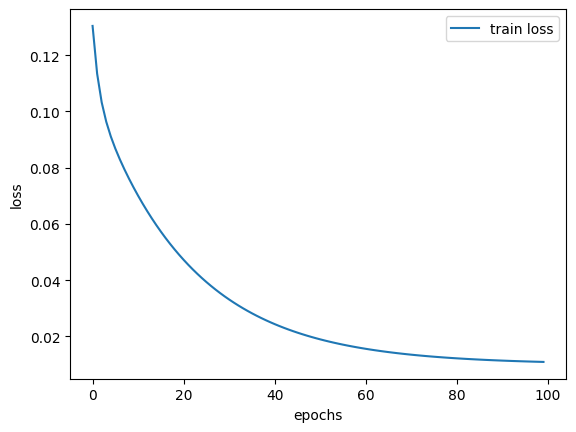

In [28]:
from matplotlib import pyplot as plt

plt.plot(losses, label="train loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

다중 선형 회귀도 순조롭게 학습되는 것을 확인할 수 있습니다. 독립 변수의 차원이 4이기 때문에 시각화가 불가하여 여기까지만 진행하겠습니다. 최종 학습된 모델 파라미터는 아래와 같습니다.

In [29]:
model.linear.weight

Parameter containing:
tensor([[ 0.1356, -0.0527,  0.6359,  0.0711]], requires_grad=True)

In [30]:
model.linear.bias

Parameter containing:
tensor([-0.0739], requires_grad=True)

## 정리

이번 챕터에서는 다중 선형 회귀를 torch를 이용해서 학습시켜 보았습니다. 다중 선형 회귀 모델보다도 더 중요한 부분은 독립변수와 웨이트와의 곱이 행렬 곱으로 표현된다는 점입니다. 이 부분을 잘 기억하고 넘어가기 바랍니다.